> Link to our presentation video: https://youtu.be/GgzeOJv4lV8

# Analysis on Relationship between California Gas Price and UCSD Parking Occupancy

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

Recently, gas prices have continued to rise and parking on campus has become more crowded. These phenomena sparked our interest and we aimed to explore the correlation between California gas prices and UCSD parking occupancy. We hypothesized that an increase in California gas prices would lead to a drop in the campus parking occupancy of A/B/V types of permits and an increase in the campus parking occupancy of allocated (carpool and electric vehicle) type of permits. In order to verify our conjecture, we cleaned the raw datasets, performed exploratory data analysis to explore relevant variables, and implemented the OLS regression to verify the correlation eventually. The final result doesn't align with our first hypothesis but instead accords with our second one, indicating certain confounding variables that require our consideration and further analysis.

# Names

- Ang Li
- Binyuan Yan
- Qing Wen
- Tangran Dong
- Zhuojin Yu

<a id='research_question'></a>
# Research Question

We want to study the relationship between California gas price and UCSD parking situation. More specifically, we want to study if the change in California average gas price will exert an impact on UCSD campus parking occupancy. 

<a id='background'></a>

## Background & Prior Work

Americans spend an average of 17 hours per year searching for parking, resulting in a cost of $345 per driver in wasted time, fuel, and emissions. [1] The lack of parking spaces is a troublesome question for UCSD students as well. In the Guardian, a Marshall College junior, Camerson, described, "If I do not arrive at least one hour before my 8:00 classes, I risk having to park in the Whole Foods/Ralph’s parking lot, which is a mile away from the campus [2]." In order to help students, faculty, and staff to find parking vacancies easier, we decide to study the pattern of the UCSD parking occupancy and correlate it with one of the significant factors that affect people’s decisions about whether to drive or not—gas price.

According to the recent survey of American Automobile Association (AAA), among Americans who said they would make changes in response to higher gas prices, a majority (80%) said they would opt to drive less [3]. From the previous study conducted by Dr. Bento, higher gas prices result in some commuters choosing the alternative option, which reduces the number of vehicles on the road [4]. Given the fact that when people are driving less, parking spaces are more likely to be vacant. However, as Dr. Bento's study and AAA's survey describe, special transporting methods such as carpool and electric vehicles are two major alternatives besides simply driving less when the gas price increases. In UCSD, we found the "allocated" parking permits are specially for carpool and electric vehicles users. We could see increased usage of such permits due to the fact that people opt out to drive less gasoline cars.

Our project proposes to analyze the data from the parking surveys at UCSD and find out the relationship between the parking occupancy and the gas price trend in California. In addition, we are analyzing the data on a quarterly basis from the 2019 Fall to the 2023 Fall [5]. These five years is further divided into two periods by the COVID-19 outbreak as our analysis proceed.

Reference

[1] Searching for Parking Costs Americans $73 Billion a Year https://inrix.com/press-releases/parking-pain-us/

[2] UCSD Implements New Parking Permit Policies https://ucsdguardian.org/2021/10/03/ucsd-implements-new-parking-permit-policies/

[3] Edmonds, E. (2022, March 21). AAA: $4 gas the tipping point for most Americans. https://newsroom.aaa.com/2022/03/aaa-4-gas-the-tipping-point-for-most-americans/

[4] Antonio M. Bento, Carpooling and driver responses to fuel price changes http://econbus-papers.mines.edu/working-papers/wp201206.pdf 

[5] parking surveys, UCSD parking transportation services http://rmp-wapps.ucsd.edu/TS/Survey/surv.html

# Hypothesis


We have two main hypotheses:
1. An increase in California gas price will lead to a drop in the campus parking occupancy of A/B/V type of permits
2. An increase in California gas price will lead to an increase in the campus parking occupancy of allocated (carpool and electric vehicle) type of permits

The reason of making these hypotheses is because when gas price is higher, people will prefer carpool, electric vehicle or even just driving less, and this assumption is well-supported by our background research.

# Dataset(s)

- Dataset Name: UCSD Quarterly Parking Occupancy Report
- Link to the dataset: http://rmp-wapps.ucsd.edu/TS/Survey/
- Number of observations: 19 quarters from 2017 Spring to 2022 Spring (missing 2018 Fall)
- Description: This dataset contains quarterly average parking occupancy on UCSD campus.

- Dataset Name: California Monthly Average Gas Price
- Link to the dataset: https://www.eia.gov/dnav/pet/pet_pri_gnd_dcus_sca_m.htm
- Number of observations: 334 months from Jan 1995 to Oct 2022
- Description: This dataset contains California's monthly average gas price of different grades.

To match UCSD Quarterly Parking Occupancy Report, we selects data from March 2017 to June 2022 of California Monthly Average Gas Price and combine every three months into a quarter.

# Setup

In [1]:
# import external packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import patsy
import statsmodels.api as sm

Import the datasets we will be using:

In [2]:
# Import parking dataset
Occu_17Sp = pd.read_csv('data/Occupancy 2016-2017-4 Spring.csv')
Occu_17Sp = Occu_17Sp.drop([0,2,3,4])
Occu_17Su = pd.read_csv('data/Occupancy 2017-2018-1 Summer.csv')
Occu_17Su = Occu_17Su.drop([0,2,3,4])
Occu_17Fa = pd.read_csv('data/Occupancy 2017-2018-2 Fall.csv')
Occu_17Fa = Occu_17Fa.drop([0,2,3,4])
Occu_18Wi = pd.read_csv('data/Occupancy 2017-2018-3 Winter.csv')
Occu_18Wi = Occu_18Wi.drop([0,2,3,4])
Occu_18Sp = pd.read_csv('data/Occupancy 2017-2018-4 Spring.csv')
Occu_18Sp = Occu_18Sp.drop([0,2,3,4])
Occu_18Su = pd.read_csv('data/Occupancy 2018-2019-1 Summer.csv')
Occu_18Su = Occu_18Su.drop([0,2,3,4])
Occu_19Wi = pd.read_csv('data/Occupancy 2018-2019-3 Winter.csv')
Occu_19Wi = Occu_19Wi.drop([0,2,3,4])
Occu_19Sp = pd.read_csv('data/Occupancy 2018-2019-4 Spring.csv')
Occu_19Sp = Occu_19Sp.drop([0,2,3,4])
Occu_19Su = pd.read_csv('data/Occupancy 2019-2020-1 Summer.csv')
Occu_19Su = Occu_19Su.drop([0,2,3,4])
Occu_19Fa = pd.read_csv('data/Occupancy 2019-2020-2 Fall.csv')
Occu_19Fa = Occu_19Fa.drop([0,2,3,4])
Occu_20Wi = pd.read_csv('data/Occupancy 2019-2020-3 Winter.csv')
Occu_20Wi = Occu_20Wi.drop([0,2,3,4])
Occu_20Sp = pd.read_csv('data/Occupancy 2019-2020-4 Spring.csv')
Occu_20Sp = Occu_20Sp.drop([0,2,3,4])
Occu_20Su = pd.read_csv('data/Occupancy 2020-2021-1 Summer.csv')
Occu_20Su = Occu_20Su.drop([0,2,3,4])
Occu_20Fa = pd.read_csv('data/Occupancy 2020-2021-2 Fall.csv')
Occu_20Fa = Occu_20Fa.drop([0,2,3,4])
Occu_21Wi = pd.read_csv('data/Occupancy 2020-2021-3 Winter.csv')
Occu_21Wi = Occu_21Wi.drop([0,2,3,4])
Occu_21Sp = pd.read_csv('data/Occupancy 2020-2021-4 Spring.csv')
Occu_21Sp = Occu_21Sp.drop([0,2,3,4])
Occu_21Su = pd.read_csv('data/Occupancy 2021-2022-1 Summer.csv')
Occu_21Su = Occu_21Su.drop([0,2,3,4])
Occu_21Fa = pd.read_csv('data/Occupancy 2021-2022-2 Fall.csv')
Occu_21Fa = Occu_21Fa.drop([0,2,3,4])
Occu_22Wi = pd.read_csv('data/Occupancy 2021-2022-3 Winter.csv')
Occu_22Wi = Occu_22Wi.drop([0,2,3,4])
Occu_22Sp = pd.read_csv('data/Occupancy 2021-2022-4 Spring.csv')
Occu_22Sp = Occu_22Sp.drop([0,2,3,4])
occu_raw = pd.concat([Occu_17Sp, Occu_17Su, Occu_17Fa, Occu_18Wi, Occu_18Sp, Occu_18Su, Occu_19Wi,Occu_19Sp, Occu_19Su, Occu_19Fa, Occu_20Wi,
                        Occu_20Sp, Occu_20Su, Occu_20Fa, Occu_21Wi, Occu_21Sp, Occu_21Su, Occu_21Fa, Occu_22Wi, Occu_22Sp])

# Import gas dataset
gas_raw = pd.read_csv("data/california_gas_price.csv")

# Data Cleaning

## Cleaning Parking Occupancy Dataset

First take a look at our occupancy dataset:

In [3]:
occu_raw.head(20)

,"University of California, San Diego Survey of Parking Space Occupancy Levels, Spring, 2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,"University of California, San Diego Survey of Parking Space Occupancy Levels, Winter, 2020","University of California, San Diego Survey of Parking Space Occupancy Levels, Spring 2020","University of California, San Diego Survey of Parking Space Occupancy Levels, Summer 2020","University of California San Diego Survey of Parking Space Occupancy Levels, Fall 2020","University of California, San Diego Survey of Parking Space Occupancy Levels, Winter 2021","University of California, San Diego Survey of Parking Space Occupancy Levels, Spring 2021","University of California, San Diego Survey of Parking Space Occupancy Levels, Summer 2021","University of California, San Diego Survey of Parking Space Occupancy Levels, Fall 2021","University of California, San Diego Survey of Parking Space Occupancy Levels, Winter 2022","University of California, San Diego Survey of Parking Space Occupancy Levels, Spring 2022"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,University,A,2808,2052,1450,785,490,422,420,399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,of,B,6532,2876,1612,649,450,451,475,489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"California,",S,3687,1534,1326,988,722,595,492,489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,San Diego,Visitor,2290,1533,1153,742,575,571,630,644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Reserved,528,448,367,315,294,278,290,278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,Allocated,1255,948,787,560,420,382,420,432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,Accessible,681,402,320,235,205,215,209,221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,UC Vehicle,239,86,98,101,74,79,62,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,Service Yard,138,71,60,48,42,47,43,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset is simply concatenating statistics of every quarter's parking situation across the row. It is not in the form we want and is hard to analyze. We want to tranform it into a table where the variables are different types of parking space (A, B, V, S, etc.) and every obsevation is the average parking occupancy of a quarter.

First of all, we drop NA rows/columns and rename the columns and index of the original dataset to make it more readable.

In [4]:
occu = occu_raw.dropna(axis=0, how='all') # Drop empty rows
occu = occu.iloc[:, 1:-20]
occu = occu.reset_index(drop=True)
occu.columns = ['Permit types', 'Parking spaces', '8:00 a.m.', '9:00 a.m.', '10:00 a.m.', '11:00 a.m.', '12:00 p.m.', '1:00 p.m.',  '2:00 p.m.', '3:00 p.m.','4:00 p.m.','5:00 p.m.',
'Empty parking spaces', 'Occupied parking spaces', 'Occupancy %']
occu = (
    occu[(occu.get('Permit types') == 'A')|(occu.get('Permit types') == 'B')|
         (occu.get('Permit types') == 'S')|(occu.get('Permit types') == 'Visitor')|
         (occu.get('Permit types') == 'Reserved')|(occu.get('Permit types') == 'Allocated')]
)
occu = occu.set_index('Permit types')
occu.head(6)

,Parking spaces,8:00 a.m.,9:00 a.m.,10:00 a.m.,11:00 a.m.,12:00 p.m.,1:00 p.m.,2:00 p.m.,3:00 p.m.,4:00 p.m.,5:00 p.m.,Empty parking spaces,Occupied parking spaces,Occupancy %
Permit types,,,,,,,,,,,,,,
A,2808,2052,1450,785,490,422,420,399,529,737,965,399,2409,86%
B,6532,2876,1612,649,450,451,475,489,693,1448,2531,450,6082,93%
S,3687,1534,1326,988,722,595,492,489,601,738,936,489,3198,87%
Visitor,2290,1533,1153,742,575,571,630,644,763,972,1181,571,1719,75%
Reserved,528,448,367,315,294,278,290,278,291,320,354,278,250,47%
Allocated,1255,948,787,560,420,382,420,432,482,578,736,382,873,70%


In the original dataset, the given `occupancy` column is the occupancy at peak time. To gain a more general information, we want to use the average occupancy instead of the peak occupancy. To achieve this, we calculate the average of the parking occupancy across different time in the day as the representing average parking occupancy of a quarter. After that, we tranform the dataframe into the form we mentioned above. We append two additional columns `Year` and `Quarter` at the end so that we can refer to obeservations eaiser afterwards.

In [5]:
occu = occu.iloc[:,:-1].astype(int)
occu['Average_Occupancy'] = occu.iloc[:,1:11].sum(axis=1)/10
A_permit = 1 - occu.get('Average_Occupancy').loc['A'] / occu['Parking spaces'].loc['A']
B_permit = 1 - occu.get('Average_Occupancy').loc['B'] / occu['Parking spaces'].loc['B']
S_permit = 1 - occu.get('Average_Occupancy').loc['S'] / occu['Parking spaces'].loc['S']
V_permit = 1 - occu.get('Average_Occupancy').loc['Visitor'] / occu['Parking spaces'].loc['Visitor']
R_permit = 1 - occu.get('Average_Occupancy').loc['Reserved'] / occu['Parking spaces'].loc['Reserved']
Allo_permit = 1 - occu.get('Average_Occupancy').loc['Allocated'] / occu['Parking spaces'].loc['Allocated']
year = [2017,2017,2017,
        2018,2018,2018,
        2019,2019,2019,2019,
        2020,2020,2020,2020,
        2021,2021,2021,2021,
        2022,2022]
quarter = ['Spring','Summer','Fall','Winter',
           'Spring','Summer','Winter',
           'Spring','Summer','Fall','Winter',
           'Spring','Summer','Fall','Winter',
           'Spring','Summer','Fall','Winter',
           'Spring']
data = (
    {'A': A_permit.to_list(),'B': B_permit.to_list(), 
     'S': S_permit.to_list(), 'V': V_permit.to_list(), 'Reserved': R_permit.to_list(), 'Allocated': Allo_permit.to_list(),
     'Year': year, 'Quarter': quarter, 'Year_Quarter': pd.Series(year).astype('string') + pd.Series(quarter)}
)

avg_occu = pd.DataFrame(data).set_index('Year_Quarter')
avg_occu

,A,B,S,V,Reserved,Allocated,Year,Quarter
Year_Quarter,,,,,,,,
2017Spring,0.706232,0.821280,0.771603,0.617293,0.387311,0.542231,2017,Spring
2017Summer,0.643769,0.764463,0.421909,0.546269,0.362113,0.531844,2017,Summer
2017Fall,0.790545,0.842986,0.828264,0.713008,0.373179,0.577970,2017,Fall
2018Winter,0.830063,0.847160,0.801969,0.742380,0.413823,0.588213,2018,Winter
2018Spring,0.804197,0.825063,0.833324,0.741412,0.406838,0.580471,2018,Spring
2018Summer,0.773114,0.719935,0.438879,0.627532,0.405724,0.566776,2018,Summer
2019Winter,0.829289,0.828235,0.752465,0.694146,0.416415,0.584821,2019,Winter
2019Spring,0.791994,0.834171,0.724536,0.708533,0.414691,0.637013,2019,Spring
2019Summer,0.743046,0.771818,0.607727,0.639578,0.381924,0.579126,2019,Summer


## Cleaning California Gas Price Dataset

The gas dataset contains over 20 years of data, and we don't need all of them. We drop NA rows/columns and select out necessary observations that we'll be using (from April 2017 to June 2022).

In [6]:
gas = gas_raw.iloc[267:330].reset_index(drop=True)
gas = gas.dropna(axis=1, how='all')
gas

,Date,California All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),California Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),California Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon),California Premium All Formulations Retail Gasoline Prices (Dollars per Gallon),California No 2 Diesel Retail Prices (Dollars per Gallon),California No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail Prices (Dollars per Gallon)
0,Apr-2017,3.067,3.009,3.146,3.264,2.938,2.938
1,May-2017,3.101,3.043,3.180,3.297,2.922,2.922
2,Jun-2017,3.080,3.023,3.158,3.273,2.895,2.895
3,Jul-2017,3.005,2.950,3.080,3.192,2.876,2.876
4,Aug-2017,3.073,3.017,3.153,3.265,2.959,2.959
...,...,...,...,...,...,...,...
58,Feb-2022,4.660,4.568,4.820,4.934,5.018,5.018
59,Mar-2022,5.655,5.562,5.829,5.928,6.133,6.133
60,Apr-2022,5.692,5.598,5.867,5.980,6.260,6.260
61,May-2022,5.871,5.774,6.052,6.158,6.479,6.479


We observe that the last two columns seem to be the same. Let's check if this is true:

In [7]:
# Check if the last two columns are the same
gas.iloc[:, -1].equals(gas.iloc[:, -2])

True

So the last two columns indeed contain the exact same information. This means that all diesel after Apr 2017 are ultra-low-sulfur. Therefore, we can drop the redundant last column. We then rename columns into more readable name.

In [8]:
gas = gas.iloc[:, :-1]
gas.columns = ['date', 'all', 'regular', 'midgrade', 'premium', 'diesel']
gas

,date,all,regular,midgrade,premium,diesel
0,Apr-2017,3.067,3.009,3.146,3.264,2.938
1,May-2017,3.101,3.043,3.180,3.297,2.922
2,Jun-2017,3.080,3.023,3.158,3.273,2.895
3,Jul-2017,3.005,2.950,3.080,3.192,2.876
4,Aug-2017,3.073,3.017,3.153,3.265,2.959
...,...,...,...,...,...,...
58,Feb-2022,4.660,4.568,4.820,4.934,5.018
59,Mar-2022,5.655,5.562,5.829,5.928,6.133
60,Apr-2022,5.692,5.598,5.867,5.980,6.260
61,May-2022,5.871,5.774,6.052,6.158,6.479


To match observations of the parking dataset, we combine every three rows into a quarter:

In [9]:
combined_gas = pd.DataFrame()
for i in range(0,gas.shape[0],3):
    quarter_ave = gas.iloc[i:i+3,1:].mean().to_frame().T
    combined_gas = pd.concat([combined_gas, quarter_ave])

Finally, as did in the parking dataset, we add `Year`, `Quarter` columns and set the index as these two columns combined for easier reference later.

In [10]:
year_list = []
for _ in range(3):
    year_list.append(2017)
for _ in range(4):
    year_list.append(2018)
for _ in range(4):
    year_list.append(2019)
for _ in range(4):
    year_list.append(2020)
for _ in range(4):
    year_list.append(2021)
for _ in range(2):
    year_list.append(2022)

combined_gas['Year'] = year_list

quarter_list = []
for _ in range(5):
    quarter_list.append('Spring')
    quarter_list.append('Summer')
    quarter_list.append('Fall')
    quarter_list.append('Winter')
quarter_list.append('Spring')

combined_gas['Quarter'] = quarter_list

combined_gas['Year_Quarter'] = combined_gas['Year'].astype('string') + combined_gas['Quarter']
combined_gas = combined_gas.set_index('Year_Quarter')

combined_gas

,all,regular,midgrade,premium,diesel,Year,Quarter
Year_Quarter,,,,,,,
2017Spring,3.082667,3.025000,3.161333,3.278000,2.918333,2017,Spring
2017Summer,3.099333,3.043667,3.177333,3.289000,3.001000,2017,Summer
2017Fall,3.206000,3.148333,3.286333,3.401000,3.439333,2017,Fall
2018Winter,3.387667,3.328667,3.469000,3.586667,3.657667,2018,Winter
2018Spring,3.660000,3.593333,3.759000,3.872667,3.898667,2018,Spring
2018Summer,3.583000,3.508667,3.701333,3.813000,3.956667,2018,Summer
2018Fall,3.586667,3.512000,3.706667,3.813667,3.987333,2018,Fall
2019Winter,3.270000,3.194000,3.388333,3.506333,3.758667,2019,Winter
2019Spring,3.900000,3.828000,4.016333,4.122000,4.038667,2019,Spring


# Data Analysis & Results

Before we proceed, let's first take a look at the number of observations of our occupancy and gas price dataset:

In [11]:
print("Length of parking occupancy dataset:")
print(len(avg_occu))
print("Length of gas price dataset:")
print(len(combined_gas))

Length of parking occupancy dataset:
20
Length of gas price dataset:
21


The two datasets are not of equal length. Let's take a closer look at the differences:

In [12]:
print("Observations of parking occupancy dataset:")
print(avg_occu.index)
print("Observations of gas price dataset:")
print(combined_gas.index)

Observations of parking occupancy dataset:
Index(['2017Spring', '2017Summer', '2017Fall', '2018Winter', '2018Spring',
       '2018Summer', '2019Winter', '2019Spring', '2019Summer', '2019Fall',
       '2020Winter', '2020Spring', '2020Summer', '2020Fall', '2021Winter',
       '2021Spring', '2021Summer', '2021Fall', '2022Winter', '2022Spring'],
      dtype='string', name='Year_Quarter')
Observations of gas price dataset:
Index(['2017Spring', '2017Summer', '2017Fall', '2018Winter', '2018Spring',
       '2018Summer', '2018Fall', '2019Winter', '2019Spring', '2019Summer',
       '2019Fall', '2020Winter', '2020Spring', '2020Summer', '2020Fall',
       '2021Winter', '2021Spring', '2021Summer', '2021Fall', '2022Winter',
       '2022Spring'],
      dtype='string', name='Year_Quarter')


The parking occupancy dataset misses `2018Fall` observation. To match with it, let's remove the `2018Fall` observation from gas price dataset:

In [13]:
combined_gas = combined_gas.drop(index='2018Fall')
print(len(avg_occu) == len(combined_gas))

True


Now we can move forward to EDA.

## Descriptive Data Analysis

### Parking Occupancy

Let's get a sense of what information we have in our parking occupancy dataset:

In [14]:
# Print the shape of the dataset
print("Shape of the dataset:")
print(avg_occu.shape)
print()

# Print the type of parking we have
print("Type of parking space:")
print(avg_occu.columns.values[:-2]) # Drop year and quarter
print()

# Get descriptive statistics for quantitative variables
print("Descriptive statistics:")
print(avg_occu.describe().iloc[:, :-1]) # Drop year

Shape of the dataset:
(20, 8)

Type of parking space:
['A' 'B' 'S' 'V' 'Reserved' 'Allocated']

Descriptive statistics:
               A          B          S          V   Reserved  Allocated
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000
mean    0.677569   0.704819   0.605294   0.630333   0.383634   0.544317
std     0.151285   0.148895   0.237978   0.105263   0.076255   0.083075
min     0.371078   0.366573   0.089402   0.363251   0.248986   0.327710
25%     0.549800   0.618223   0.434636   0.588060   0.354862   0.512934
50%     0.724639   0.744123   0.666131   0.645202   0.384617   0.572373
75%     0.792110   0.825856   0.808378   0.709652   0.411452   0.588753
max     0.890127   0.865558   0.886883   0.760076   0.561477   0.688589


We can already find some interesting information from the descriptive data. First of all, we can notice that `Reserved` parking behaves significantly different from other type of parkings. It has a much lower mean value of average occupancy and the lowest standard deviation. This makes sense as the reserved parking spots are used by stable owners. Others cannot park on them even if there are available ones. Therefore, `Reserved` parking might not be a very representative type of parking of overall campus parking situation. Generally, `A`, `B`, and `V` parking spaces behave similar. Notice that `S` type of parking has a significantly larger standard deviation. We then notice its minimum value is much lower than other types of parking. Let's find out which year is that minimum value from.

In [15]:
print(avg_occu.iloc[np.argmin(avg_occu['S'])])

A            0.538335
B            0.401728
S            0.089402
V             0.45323
Reserved     0.248986
Allocated    0.428941
Year             2020
Quarter        Summer
Name: 2020Summer, dtype: object


It's from 2020 Summer. What happened to that year? It turned out that year was the first summer after the COVID-19 pandemic had started. Since the parking demand was significantly lower than usual during that period, the university carried out a policy that every one with valid parking permit can parked on `A`, `B` or `S` parking equally. From this fact, we can have a reasonable inference for the phenomenon: since `A`, `B` parkings are at better locations than `S` parking, during that quarter many students chose to park at `A` and `B` space instead of `S`, and that's the reason why `S` parking had a significantly lower minimum value.

These analysis indicate that when analyzing the relationship between gasoline cars' parking occupancy and gas price, we might want to start on `A`, `B` or `V` type of parking first instead of S or reserved parking as they are more representative and less affected by special policies. We also want to pay attention to the possible effect caused by pandamic during our further analysis. For carpool and electric vehicles, we can directly use values from `Allocated`.

### Gas Price

Similarly, let's print out the descriptive statistics of gas price dataset:

In [16]:
# Print the shape of the dataset
print("Shape of the dataset:")
print(combined_gas.shape)
print()

# Print the type of gas we have
print("Type of gas:")
print(combined_gas.columns[:-2]) # Drop year and quarter
print()

# Get descriptive statistics for quantitative variables
print("Descriptive statistics:")
print(combined_gas.describe().iloc[:, :-1]) # Drop year

Shape of the dataset:
(20, 7)

Type of gas:
Index(['all', 'regular', 'midgrade', 'premium', 'diesel'], dtype='object')

Descriptive statistics:
             all    regular   midgrade    premium     diesel
count  20.000000  20.000000  20.000000  20.000000  20.000000
mean    3.726867   3.649900   3.857367   3.962983   3.928333
std     0.749471   0.742398   0.767375   0.768116   0.830613
min     2.856667   2.772667   3.018667   3.100667   2.918333
25%     3.190500   3.126750   3.286083   3.398417   3.400500
50%     3.537667   3.456833   3.673500   3.782000   3.828667
75%     3.938417   3.862500   4.070333   4.169667   4.034417
max     5.952333   5.857667   6.129667   6.235667   6.537667


We can safely assume that most of the users of campus parking use gas instead of diesel, so data for diesel is no quite of our concern. Regular, midgrade and premium gas seem to have similar behavior. This is a natural assumption as the price of different type of gas usually increase of decrease together. To prove this, let's create a new dataframe `gas_diff` to take a look at the difference in price with regard to time:

In [17]:
gas_diff = combined_gas[['regular', 'midgrade', 'premium']].diff(periods=1, axis=0).dropna()
gas_diff

,regular,midgrade,premium
Year_Quarter,,,
2017Summer,0.018667,0.016000,0.011000
2017Fall,0.104667,0.109000,0.112000
2018Winter,0.180333,0.182667,0.185667
2018Spring,0.264667,0.290000,0.286000
2018Summer,-0.084667,-0.057667,-0.059667
2019Winter,-0.314667,-0.313000,-0.306667
2019Spring,0.634000,0.628000,0.615667
2019Summer,-0.266000,-0.248667,-0.259333
2019Fall,0.251333,0.255000,0.255333


A quick look tells us that the distributions of the price of these three types of gas are very similar. To compare similarity among these three variables, let's carry out an one-way ANOVA test on them:

In [18]:
f_oneway(gas_diff['regular'], gas_diff['midgrade'], gas_diff['premium'])

F_onewayResult(statistic=0.002040655345976343, pvalue=0.9979615023306667)

The very large p-value indicates that we do not find significant differences in these three variables. Therefore, we can safely use the representative variable `all`, which includes the overall average of `regular`, `midgrade` and `premium`, in our following analysis.

Let's proceed to exploratory analysis.

## Exploratory Data analysis

### Parking Occupancy

To begin with, let's visualize the overall trends of the parking occupancy throughout the recent 5 years for `A`/`B`/`V` and for `Allocated`. For `A`/`B`/`V`, we average the occupancy of different types of parking permits and add this as a new column `ABV`.

In [19]:
Overall_occupancy = avg_occu.copy()
Overall_occupancy['ABV'] = avg_occu[['A','B','V']].mean(axis=1)
Overall_occupancy.head()

,A,B,S,V,Reserved,Allocated,Year,Quarter,ABV
Year_Quarter,,,,,,,,,
2017Spring,0.706232,0.821280,0.771603,0.617293,0.387311,0.542231,2017,Spring,0.714935
2017Summer,0.643769,0.764463,0.421909,0.546269,0.362113,0.531844,2017,Summer,0.651500
2017Fall,0.790545,0.842986,0.828264,0.713008,0.373179,0.577970,2017,Fall,0.782180
2018Winter,0.830063,0.847160,0.801969,0.742380,0.413823,0.588213,2018,Winter,0.806534
2018Spring,0.804197,0.825063,0.833324,0.741412,0.406838,0.580471,2018,Spring,0.790224


#### First, we plot the graph without specifying specific quarters.
The dark blue line denotes the change of average `ABV` occupancy each year from 2017 to 2022, while the light blue area denotes the occupancy range each year. The orange line contains similar information for `Allocated` parking.

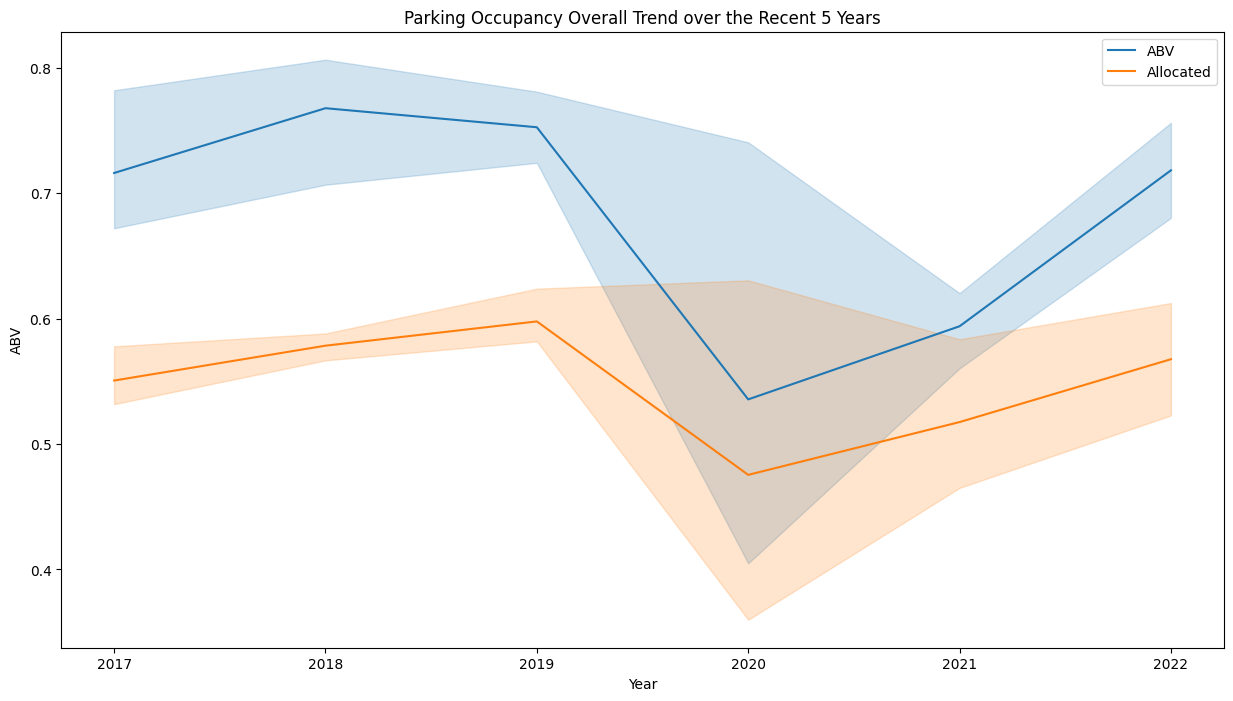

In [20]:
plt.subplots(figsize =(15, 8))
plt.title('Parking Occupancy Overall Trend over the Recent 5 Years')
sns.lineplot(data=Overall_occupancy.set_index('Year')['ABV'], legend='brief', label='ABV')
sns.lineplot(data=Overall_occupancy.set_index('Year')['Allocated'], legend='brief', label='Allocated')
plt.legend()
plt.show()

#### Then, we plot the graph with x axis containing specific quarters.

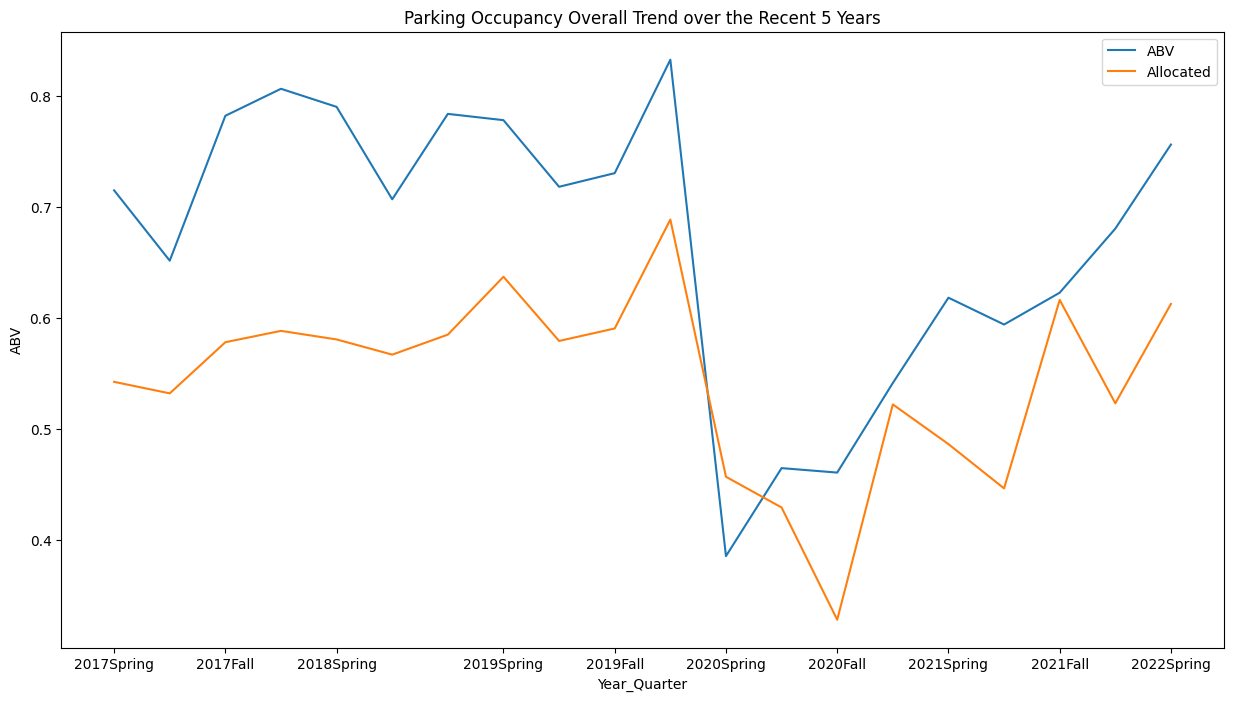

In [21]:
plt.subplots(figsize =(15, 8))
plt.title('Parking Occupancy Overall Trend over the Recent 5 Years')
sns.lineplot(data=Overall_occupancy['ABV'], legend='brief', label='ABV')
sns.lineplot(data=Overall_occupancy['Allocated'], legend='brief', label='Allocated')
plt.xticks(['2017Spring','2017Fall','2018Spring','2019Spring','2019Fall',
            '2020Spring','2020Fall','2021Spring','2021Fall','2022Spring'])
plt.show()

From the graph above we notice that both the `ABV` and `Allocated` occupancy drops a lot from 2019 Fall to 2020 Spring. One possible reason for this change is that the COVID-19 pandemic started in 2020 winter and spread rapidly afterwards. Consequently, most of the courses shifted from in-person to remote, and therefore, most of the studnets and faculties stayed at home during quarantine, which explains such a low occupancy level and this effect persisted for a long time. To get a sense of how big is the drop, let's take a look at the specific number for this period:

In [22]:
Overall_occupancy.loc[['2020Winter','2020Spring','2020Summer','2020Fall','2021Winter']]

,A,B,S,V,Reserved,Allocated,Year,Quarter,ABV
Year_Quarter,,,,,,,,,
2020Winter,0.890127,0.865558,0.886883,0.742527,0.535462,0.688589,2020,Winter,0.832737
2020Spring,0.425372,0.366573,0.211894,0.363251,0.271070,0.456639,2020,Spring,0.385065
2020Summer,0.538335,0.401728,0.089402,0.453230,0.248986,0.428941,2020,Summer,0.464431
2020Fall,0.371078,0.497194,0.280094,0.512937,0.274257,0.327710,2020,Fall,0.460403
2021Winter,0.508512,0.585258,0.587051,0.529857,0.333110,0.521886,2021,Winter,0.541209


#### Now, let's delve into each of these four types of parking spaces and explore their differences.

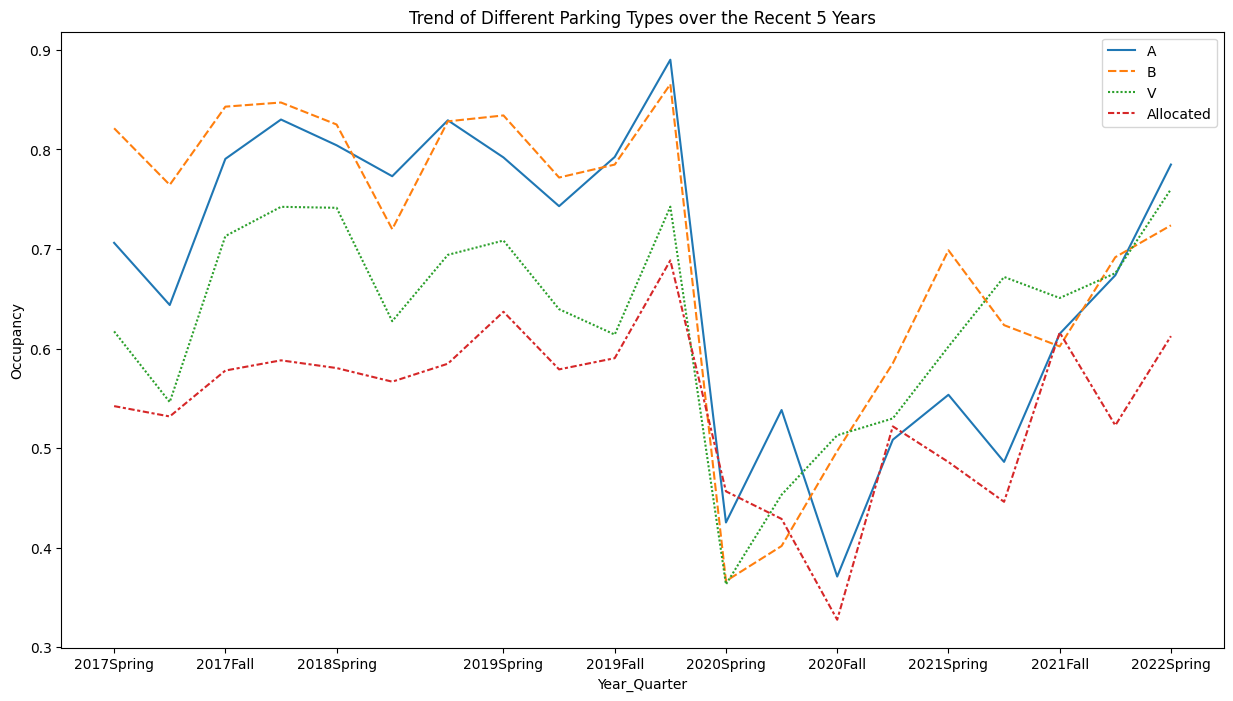

In [23]:
plt.subplots(figsize =(15, 8))
sns.lineplot(data=Overall_occupancy[['A','B','V','Allocated']]).set(title='Trend of Different Parking Types over the Recent 5 Years')
plt.xticks(['2017Spring','2017Fall','2018Spring','2019Spring','2019Fall',
            '2020Spring','2020Fall','2021Spring','2021Fall','2022Spring'])
plt.ylabel('Occupancy')
plt.show()

Let's look at the trend of different types of parking independently. For `A` parking spaces, it started with an occupancy of around 0.7, then reached its peak (about 0.9) between 2019 Fall and 2020 Spring, then it hit its lowest (about 0.4) in 2020 Spring. Then the parking occupancy started to increase gradually with minor falls, but it eventually reached a level in 2022 Spring, which is higher than its starting point (0.7). `B` parking and `V` parking follow a similar trend. We can tell that the overall trend of `A`/`B`/`V` parking between 2017 Spring and 2022 Spring is similar. The possible reason for the significant drop is the spread of Covid-19 mentioned above. For `allocated` parking space, there also exists that significant drop, but it behaves slightly different with `ABV` in other time.

#### Furthermore, we want to see the average occupancy of each quarter over each type of parking spaces.

In [24]:
quarters = ['Fall','Winter','Spring','Summer']
park_types = ['A','B','V','Allocated']
occu_type_quar = []
for i in park_types:
    for j in quarters:
        occu_type_quar.append(Overall_occupancy.loc[(Overall_occupancy['Quarter']==j)][i].mean())
type_quar = pd.DataFrame({'Quarter':['Fall','Winter','Spring','Summer',
                              'Fall','Winter','Spring','Summer',
                              'Fall','Winter','Spring','Summer',
                              'Fall','Winter','Spring','Summer'],
                           'Type':['A','A','A','A',
                                   'B','B','B','B',
                                   'V','V','V','V',
                                   'Allocated','Allocated','Allocated','Allocated'],
                           'Occupancy':occu_type_quar})

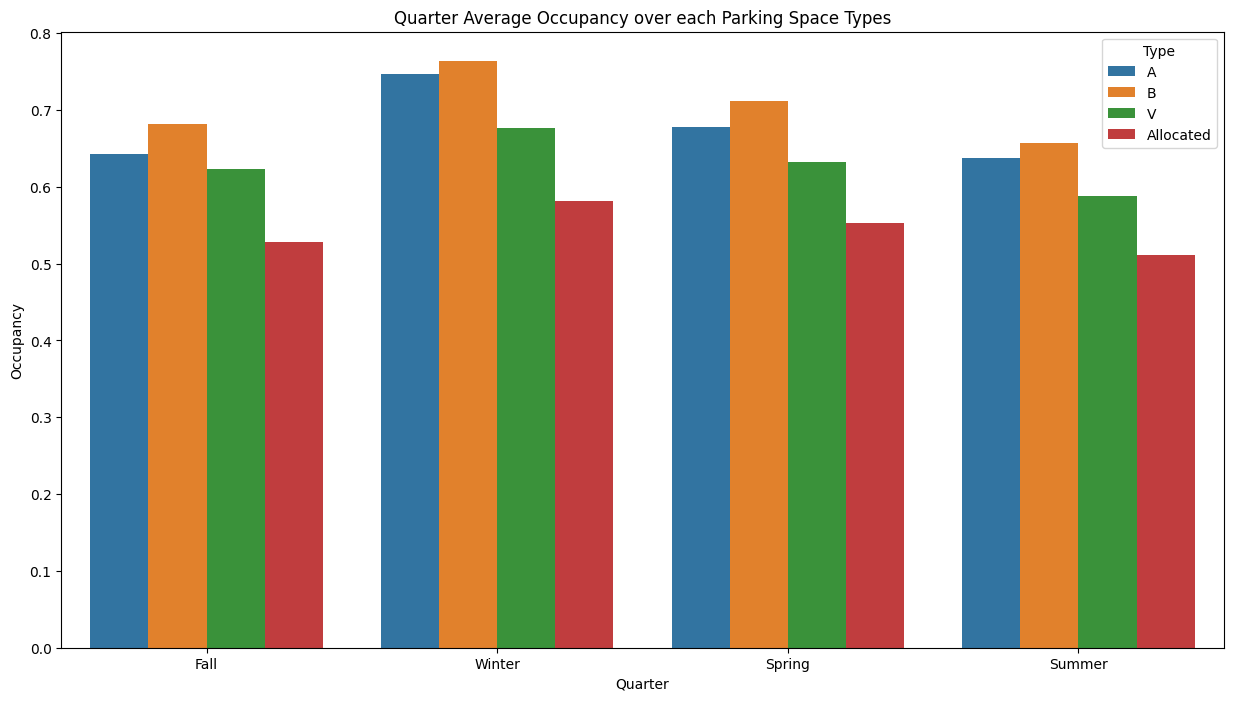

In [25]:
plt.subplots(figsize =(15, 8))
sns.barplot(x='Quarter', y='Occupancy', hue='Type', data=type_quar).set(title='Quarter Average Occupancy over each Parking Space Types')
plt.show()

This barplot shows that four types of parking share a similar trend. They all have the highest occupancy during the winter quarter and the lowest during summer. This makes sense as summer usually has a less intensive class schedule.

### Gas Price

#### First, let see the trend of all types of gas price in last 5 years without specification.
The shade areas is caused by picturing four quarters(four numbers) in one year(one point). 

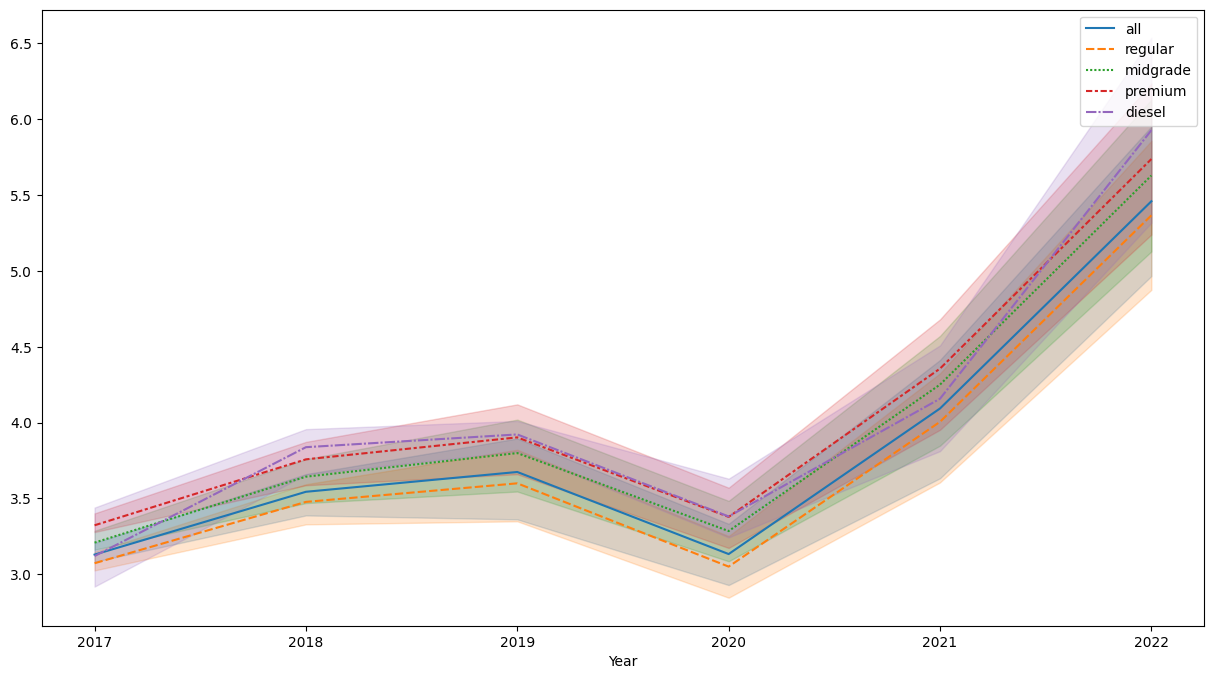

In [26]:
plt.subplots(figsize =(15, 8))
# Use lineplot to present the change of gas price over time 
sns.lineplot(data=combined_gas.set_index('Year')[['all','regular','midgrade','premium','diesel']])
plt.show()

From the descriptive data analysis we have refined the gas price list to exclude `diesel`. We have also find three types of gasoline and they increase/decrease with a similar behavior.
Therefore, we want to use `all` to represent the gas price change.
We also want to specify the price change regard to each quarter instead of using the shade range to represent four quarters. Below we plot `all` against each specific quarter:

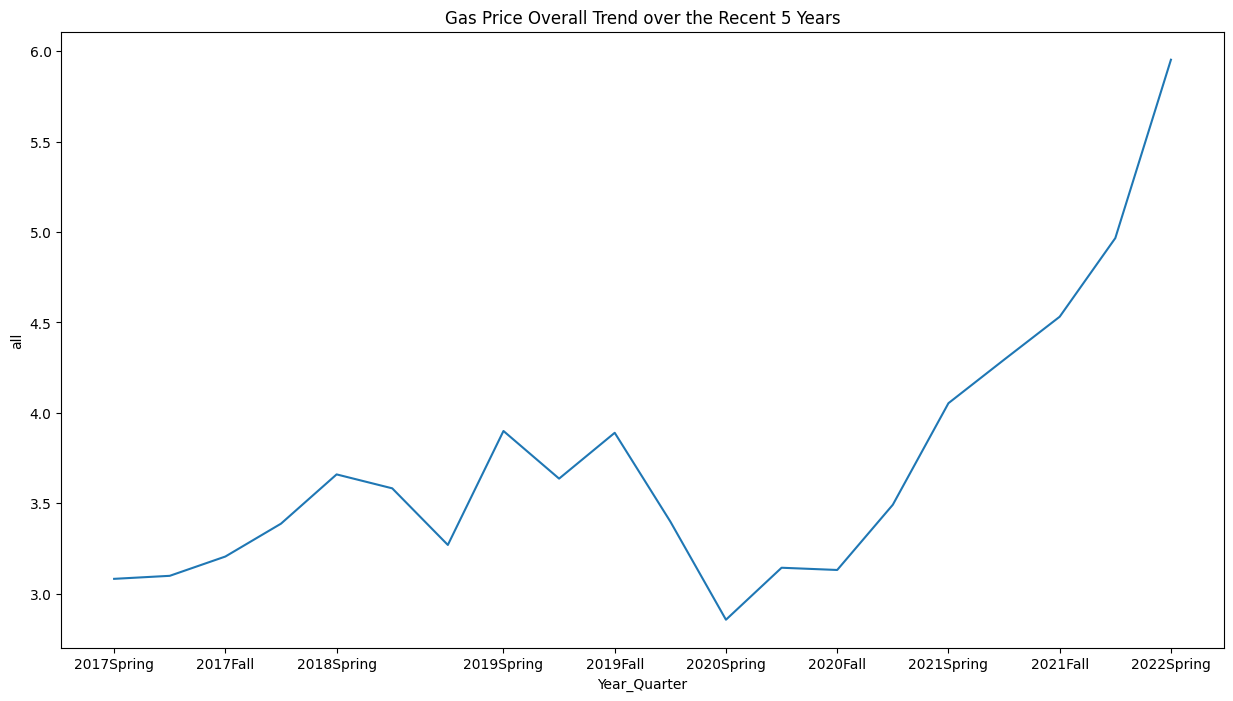

In [27]:
plt.subplots(figsize =(15, 8))
sns.lineplot(data=combined_gas['all']).set(title='Gas Price Overall Trend over the Recent 5 Years')
plt.xticks(['2017Spring','2017Fall','2018Spring','2019Spring','2019Fall',
            '2020Spring','2020Fall','2021Spring','2021Fall','2022Spring'])
plt.show()

It is obvious that there is a sharp drop between 2019 Fall and 2020 Spring, followed by several quarters of price jump.   
Although we surmised the general trend of three types of gasoline are very similar, we still want to dive into the trends of each of them to be safe. Especially when we want to determine who is responsible for the sharp drop and the price jumps. 
This could also be helpful if later we want to correlates each type of gas price trends to different permits change. 

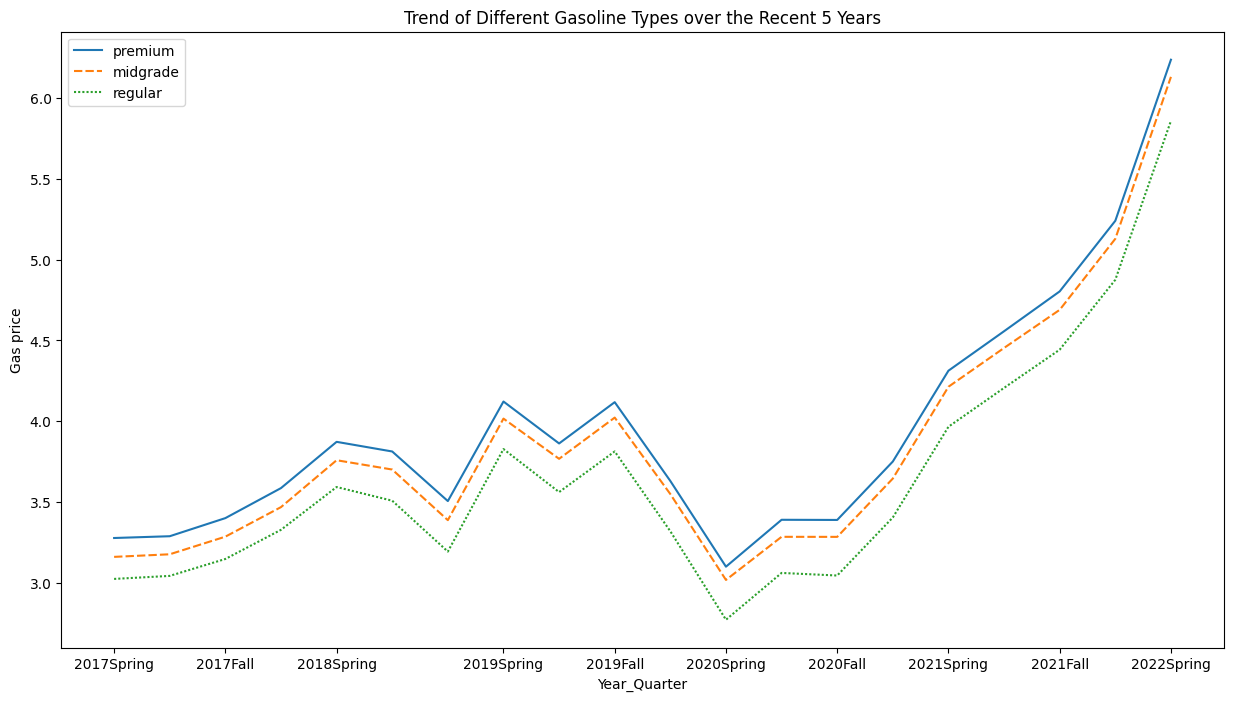

In [28]:
plt.subplots(figsize =(15, 8))
sns.lineplot(data=combined_gas[['premium','midgrade','regular']]).set(title='Trend of Different Gasoline Types over the Recent 5 Years')
plt.xticks(['2017Spring','2017Fall','2018Spring','2019Spring','2019Fall',
            '2020Spring','2020Fall','2021Spring','2021Fall','2022Spring'])
plt.ylabel('Gas price')
plt.show()

This graph verifies our descriptive data analysis that all three types of gasoline behave particularly similar.

## Relationship between Parking Occupancy and Gas Price

Now we are ready to explore the relationship between parking occupancy and gas price. As discussed above, we will mainly observe the relationship between `ABV` and `Allocated` from occupancy dataset and `all` from gas dataset, as these are the most representative variables. Let's create a new dataframe `relationship` only containing these variables for easier reference:

In [29]:
ABV = Overall_occupancy['ABV']
allocated = Overall_occupancy['Allocated']
gas_price = combined_gas['all']
relationship = pd.DataFrame({'ABV': ABV, 'allocated': allocated, 'gas_price': gas_price})
relationship

,ABV,allocated,gas_price
Year_Quarter,,,
2017Spring,0.714935,0.542231,3.082667
2017Summer,0.651500,0.531844,3.099333
2017Fall,0.782180,0.577970,3.206000
2018Winter,0.806534,0.588213,3.387667
2018Spring,0.790224,0.580471,3.660000
2018Summer,0.706860,0.566776,3.583000
2019Winter,0.783890,0.584821,3.270000
2019Spring,0.778233,0.637013,3.900000
2019Summer,0.718147,0.579126,3.636667


Let's compare the trend of these variables by looking at their lineplots. The two parking occupancy variables and gas price are not on the same scale: while the `gas_price` are measured by dollars, the `ABV` and `allocated` are ratios between 0 and 1. To get a better sense when visualizing them of a sample plot, let's multiply the two occupancy ratios by the maximum value of `gas_price`.

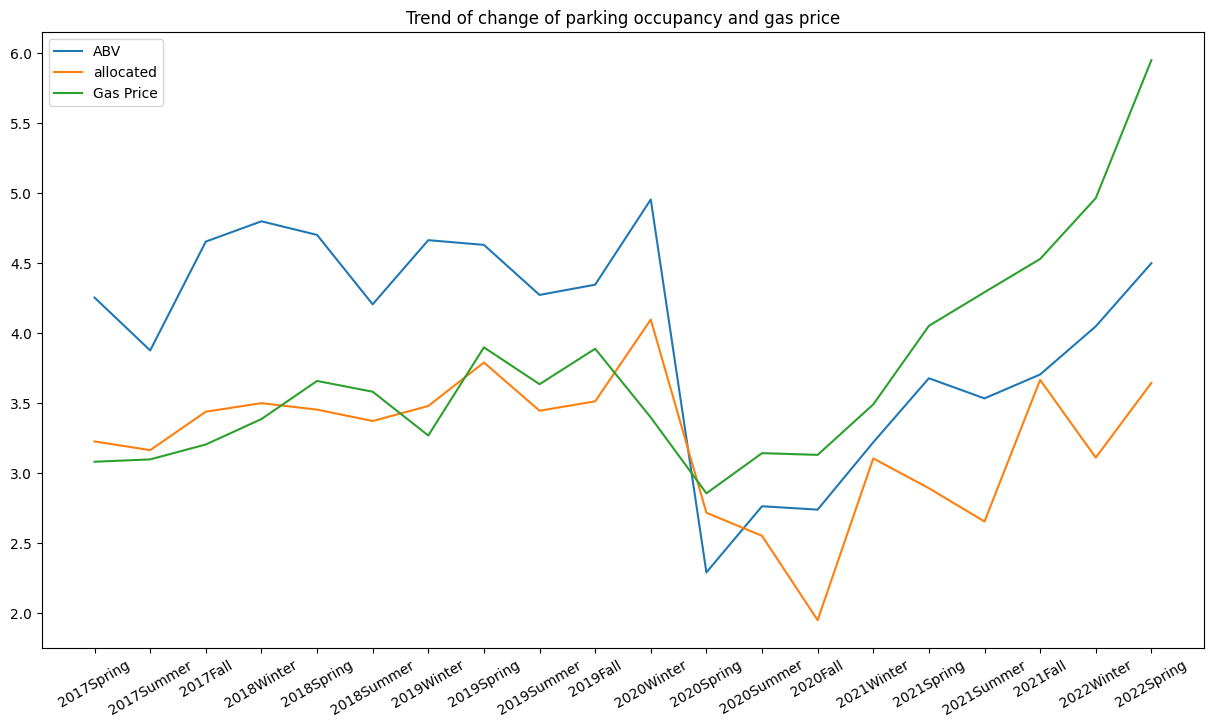

In [30]:
plt.subplots(figsize =(15, 8))
plt.plot(relationship.index, relationship['ABV'].values * np.max(relationship['gas_price']), label='ABV')
plt.plot(relationship.index, relationship['allocated'].values * np.max(relationship['gas_price']), label='allocated')
plt.plot(relationship.index, relationship['gas_price'].values, label='Gas Price')
plt.title('Trend of change of parking occupancy and gas price')
plt.xticks([
    '2017Spring','2017Summer', '2017Fall',
    '2018Winter','2018Spring','2018Summer',
    '2019Winter','2019Spring','2019Summer', '2019Fall',
    '2020Winter','2020Spring','2020Summer', '2020Fall',
    '2021Winter','2021Spring','2021Summer', '2021Fall',
    '2022Winter','2022Spring',
])
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

*As mentioned in Data Cleaning section, `2018Fall` is skipped since we don't have data for it*

Interestingly, while we assume that the rise of gas price might lower the `ABV` parking occupancy, i.e. the two variables might have some sort of negative correlation, the visualization indicates that there might instead be some positive correlations between them. We can also observe both of the variables have a significant drop from 2019 Fall to 2020 Spring. This is exactly when the pandemic broke out. It makes sense as when the pandemic broke out, people were suggested to stay at home, so the demand for gas and parking both dropped and it reflected on gas price/parking occupancy.

For `allocated` occupancy, we did observe a plausible positive correlation as expected. Let's delve into that relationship more in our following analysis.

### OLS Analysis for ABV Parking Occupancy and Gas Price

Let's first make a scatter plot (with regression line) of the two variables:

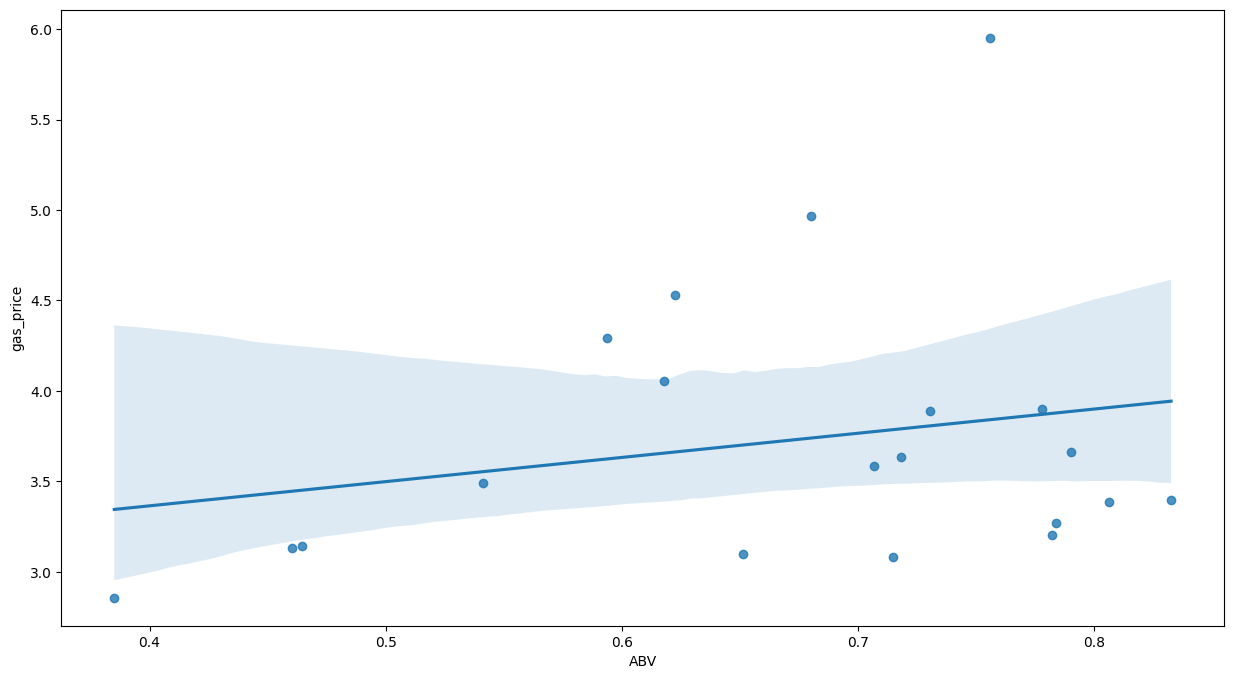

In [31]:
plt.subplots(figsize =(15, 8))
sns.regplot(data=relationship, x='ABV', y='gas_price')
plt.show()

The visualization suggests a seemingly positive relationship but with a clear branch deviating from the main branch. When parking occupancy gets larger the behavior of gas price is fluctuating by a large margin. This might be a sign of the existence of confounding variables. But before thinking about the possible confounding variables, let's carry out an OLS regression to quantitize how strong is the relationship between the two variables. For the OLS analysis here, our null hypothesis is that there is no relationship between `ABV` and `gas_price`.

In [32]:
outcome, predictors = patsy.dmatrices('ABV ~ gas_price', relationship)
res = sm.OLS(outcome, predictors).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ABV   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9818
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.335
Time:                        00:50:23   Log-Likelihood:                 13.862
No. Observations:                  20   AIC:                            -23.72
Df Residuals:                      18   BIC:                            -21.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5267      0.148      3.553      0.0

From the results we can see that `gas_price` has a positive correlation against `ABV` with a p-value of 0.335. Although the evidence is not strong enough to confirm the existence of a positive linear relationship, it is strong enough reject the null hypothesis and our original hypothesis of negative correlation.

### OLS Analysis for Allocated Parking Occupancy and Gas Price

Let's do the same for `allocated`:

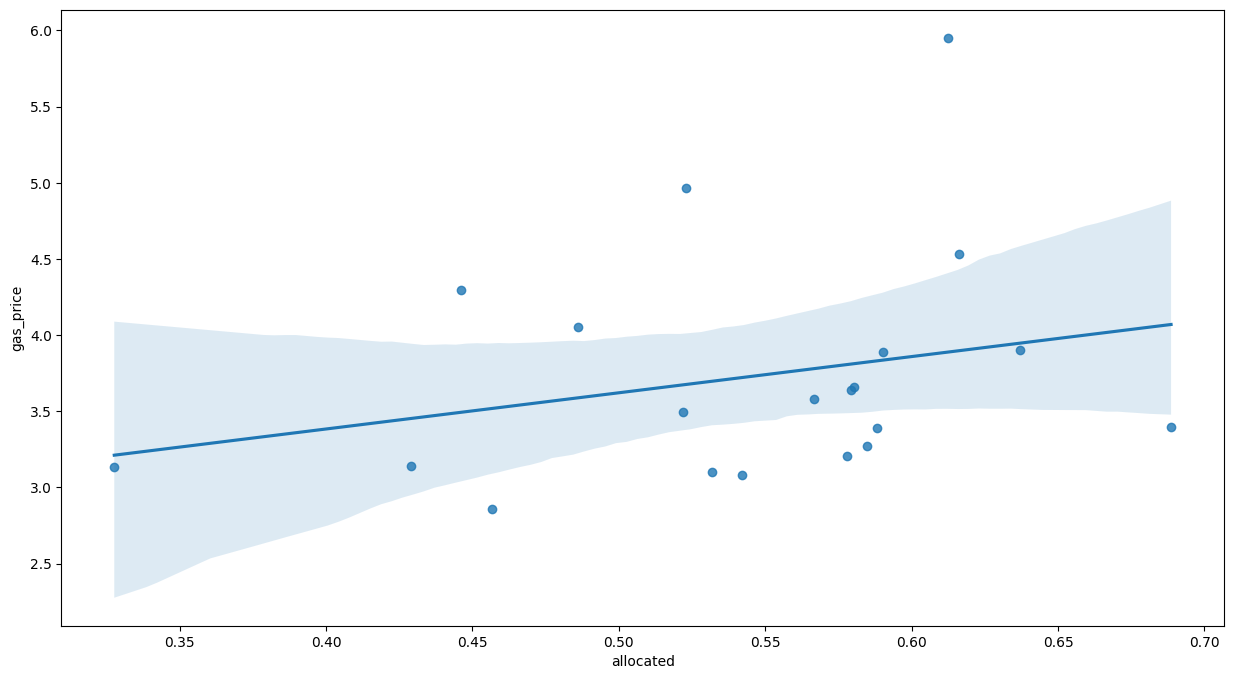

In [33]:
plt.subplots(figsize =(15, 8))
sns.regplot(data=relationship, x='allocated', y='gas_price')
plt.show()

The linear relationship looks a bit more stronger. Let's find out the p-value for OLS:

In [34]:
outcome, predictors = patsy.dmatrices('allocated ~ gas_price', relationship)
res = sm.OLS(outcome, predictors).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              allocated   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.343
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.262
Time:                        00:50:24   Log-Likelihood:                 22.614
No. Observations:                  20   AIC:                            -41.23
Df Residuals:                      18   BIC:                            -39.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4354      0.096      4.549      0.0

This p-value is smaller than the one of `ABV` against `gas price`. This is evidence supporting our hypothesis of positive correlation between occupancy of `allocated` type of parking space and `gas price`.

### Analysis of Possible Confounding Variables

Up to now we have carried out the analysis on the relationship between the occupancy of two types and parking space and gas price. We reached a conclusion that the occupancy of both type of parkings does have some relationship with `gas_price`. However, while `allocated` space behaves as we've expected, `ABV` space is not like our hypothesis, showing more of a positive relationship instead of a negative one. This doesn't really make sense in our original context: why would anyone tends to park on campus more often when the gas price is higher? We should be safe to believe that a higher gas price will lower people's intention of driving gasoline cars. We can say that it is very unlikely that the rise of `gas_price` is a **cause** of the rise of `ABV`. Therefore, a possible reason for the behavior is that there exists a stronger confounding variable that affects both gas price and `ABV` parking occupancy positively at the same time. An obvious confounding variable is **pandemic**: when it started to break out, both `gas_price` and `ABV` decreased significantly. To try to exclude the effect of pandemic, let's split our dataset into pre-pandemic and post-pandemic and conduct our OLS analysis on them separately.

Let's take the part before `2019Fall` out of the dataframe `relationship` and rename it as `pre_pandemic`:

In [35]:
pre_pandemic = relationship.iloc[:10, :]
pre_pandemic

,ABV,allocated,gas_price
Year_Quarter,,,
2017Spring,0.714935,0.542231,3.082667
2017Summer,0.651500,0.531844,3.099333
2017Fall,0.782180,0.577970,3.206000
2018Winter,0.806534,0.588213,3.387667
2018Spring,0.790224,0.580471,3.660000
2018Summer,0.706860,0.566776,3.583000
2019Winter,0.783890,0.584821,3.270000
2019Spring,0.778233,0.637013,3.900000
2019Summer,0.718147,0.579126,3.636667


Similarly, let's make a scatter plot to get a visualization of the relationship between `ABV` and `gas_price` before pandemic:

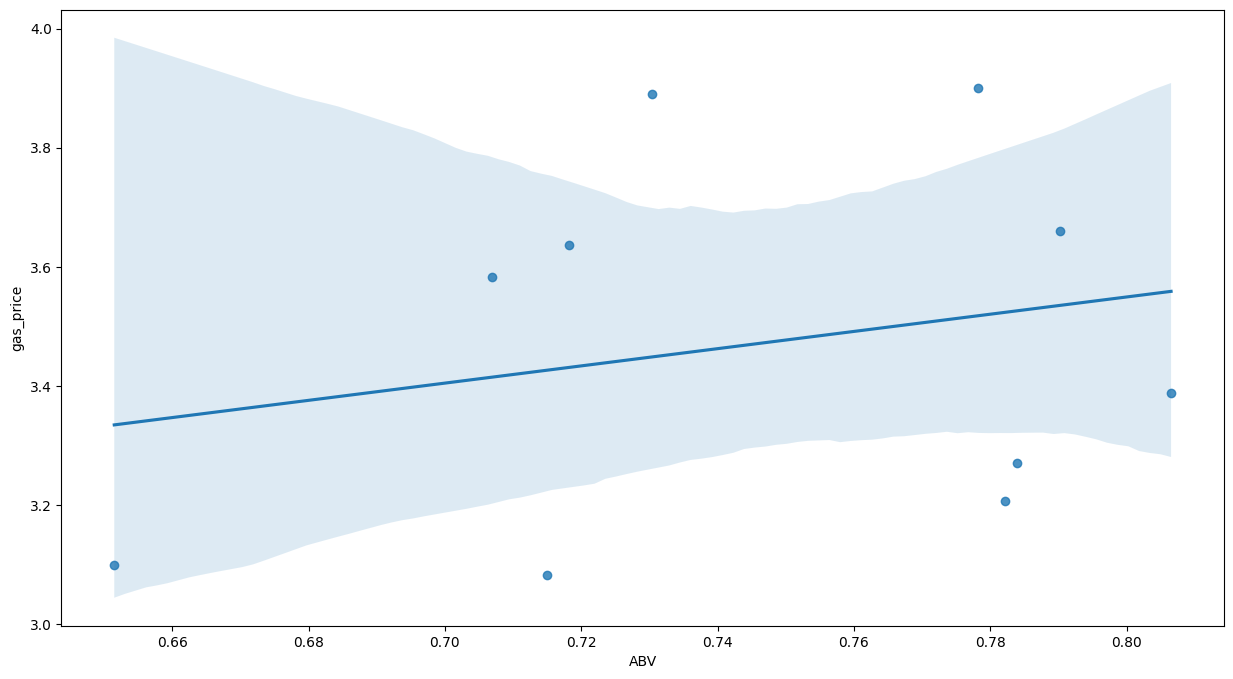

In [36]:
plt.subplots(figsize =(15, 8))
sns.regplot(data=pre_pandemic, x='ABV', y='gas_price')
plt.show()

The linear relationship now seems to be much weaker. Let's conduct the OLS analysis:

In [37]:
outcome, predictors = patsy.dmatrices('ABV ~ gas_price', pre_pandemic)
res = sm.OLS(outcome, predictors).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ABV   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.4597
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.517
Time:                        00:50:24   Log-Likelihood:                 16.721
No. Observations:                  10   AIC:                            -29.44
Df Residuals:                       8   BIC:                            -28.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6159      0.193      3.192      0.0

/home/angli/anaconda3/envs/cogs108/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p-value now becomes much higher as 0.517. This might indicate that pandemic contributes a lot to the previous p-value of 0.335 when we found that positive relationship. If it is not the pandemic, the two variables seem to be not that strong related.

Now let's look at the case after pandemic:

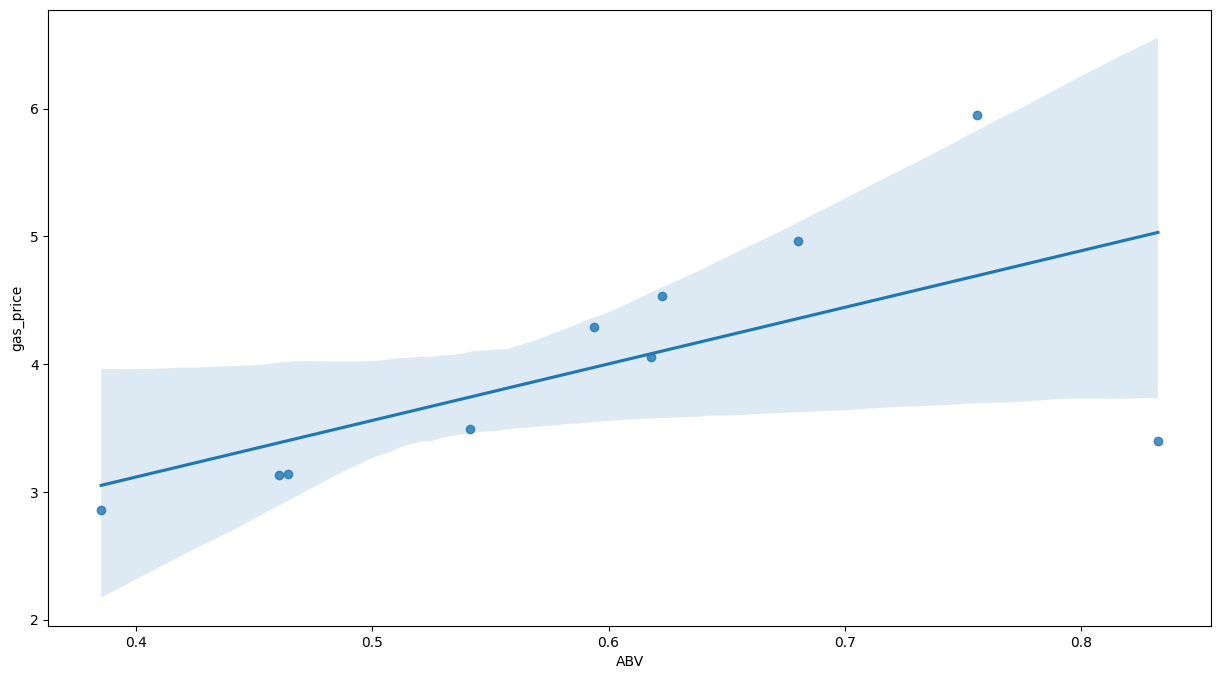

In [38]:
post_pandemic = relationship.iloc[10:, :]
plt.subplots(figsize =(15, 8))
sns.regplot(data=post_pandemic, x='ABV', y='gas_price')
plt.show()

In [39]:
outcome, predictors = patsy.dmatrices('ABV ~ gas_price', post_pandemic)
res = sm.OLS(outcome, predictors).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ABV   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     5.277
Date:                Fri, 09 Dec 2022   Prob (F-statistic):             0.0507
Time:                        00:50:24   Log-Likelihood:                 8.6218
No. Observations:                  10   AIC:                            -13.24
Df Residuals:                       8   BIC:                            -12.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2377      0.160      1.486      0.1

/home/angli/anaconda3/envs/cogs108/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p-value now becomes much lower as 0.05! This supports our assumption of pandemic being the most powerful confounding variable that affects the relationship of the two variables. Considering the result we got from analyzing pre-pandemic separately, sadly it seems like there doesn't exist a strong relationship between California gas price and UCSD `ABV` parking occupancy if it wasn't the pandemic. Indeed our analysis is limited to the size of our dataset, but it is also explainable that the gas price didn't affect `ABV` parking occupancy that much as we expected. First of all, we were not able to find data of gas price specifically for UCSD area. Using gas price from California might not be a good representation of local gas price. Secondly, before pandemic when remote-learning wasn't a regular option as it is right now, going to the university is relatively an essential demand for students and faculties. No matter if the gas price is high or not, for many of those that live far away from the campus, they have no chice but to drive to the campus. All these can be reasonable reasons why the two variables didn't act as we expect.

An immediate thought is to conduct similar analysis on `allocated` -- we can also split it into pre-pandemic and post-pandemic. Let's do the OLS analysis again for pre-pandemic and post-pandemic again: 

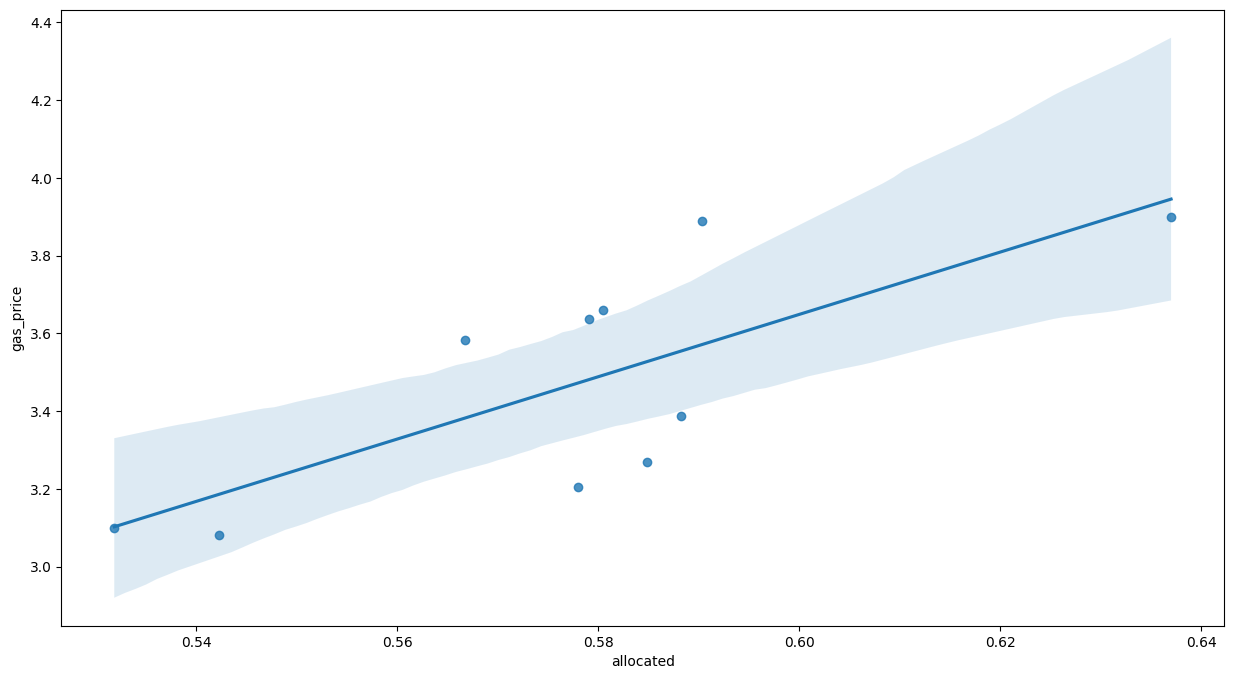

In [40]:
plt.subplots(figsize =(15, 8))
sns.regplot(data=pre_pandemic, x='allocated', y='gas_price')
plt.show()

The line plot for pre-pandamic `allocated` against `gas_price` almost immediately suggests a strong positive linear relationship. Let's look at the OLS statistics:

In [41]:
outcome, predictors = patsy.dmatrices('allocated ~ gas_price', pre_pandemic)
res = sm.OLS(outcome, predictors).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              allocated   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     10.14
Date:                Fri, 09 Dec 2022   Prob (F-statistic):             0.0129
Time:                        00:50:24   Log-Likelihood:                 25.996
No. Observations:                  10   AIC:                            -47.99
Df Residuals:                       8   BIC:                            -47.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3357      0.076      4.399      0.0

/home/angli/anaconda3/envs/cogs108/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p-value is as low as 0.013! This provides a strong proof supporting our hypothesis about the positive correlation between `allocated` and `gas_price` with the confounding variable pandemic excluded.

Let's do the same thing for post-pandemic period:

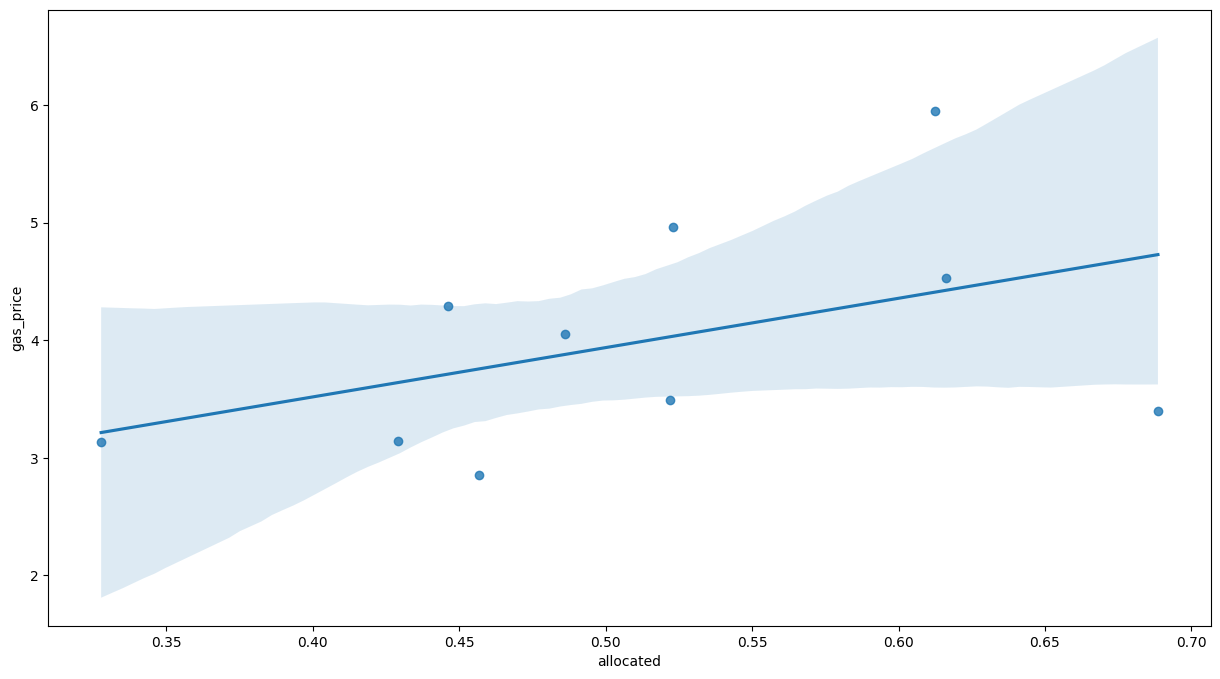

In [42]:
post_pandemic = relationship.iloc[10:, :]
plt.subplots(figsize =(15, 8))
sns.regplot(data=post_pandemic, x='allocated', y='gas_price')
plt.show()

In [43]:
outcome, predictors = patsy.dmatrices('allocated ~ gas_price', post_pandemic)
res = sm.OLS(outcome, predictors).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              allocated   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     2.109
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.184
Time:                        00:50:25   Log-Likelihood:                 9.9437
No. Observations:                  10   AIC:                            -15.89
Df Residuals:                       8   BIC:                            -15.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3125      0.140      2.231      0.0

/home/angli/anaconda3/envs/cogs108/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The p-value for post-pandemic time is still pretty high (0.184). Now we can more confidently say that there is very likely to exist a positive (linear) relationship between allocated type of parking and gas price. This meets our intuition of high gas prices being one of the reasons of people moving onto electric vehicles/carpool. However, we should also admit that our dataset has relatively few data points, so there can be more advanced research on further proving this relationship.

# Ethics & Privacy

We used datasets from the public websites. The datasets we used about college parking are legal to be accessed since the information is public on the official website, and parking occupancies we analyzed are general without emphasizing individually. All the data we used in the project should not have much bias since all of them are collected from credential sources. None of the data has contained any personal information such as their license plate, name, and etc. We only used the data we obtained for this project and not for any other use.
We also had a potential bias that we couldn’t handle thoroughly. Since there's the Covid-19 pandamic, there might be a change in people's preference of going out and impact on the gas price. Additionally, we can't filter out either data from pre-pandemic or post-pandemic due to lackness of data if we had done that.
We have made sure to explain our approach and conclusion in a righteous and honest way. We have done our best to take care of most of the ethical and privacy issues that tend to come up when dealing with dataset analysis.

# Conclusion & Discussion

In this project, we examined the trends of gas prices in California and parking occupancy levels on the UCSD campus over each specific quarter throughout the recent 5 years and delved into the relationship between these two variables. Specifically, we aimed to explore if parking occupancy, the dependent variable in our case, would be influenced by the change in California's average gas price, the independent variable. According to our background and prior work, we see that people usually have a tendency to take public transportation rather than drive when the gas price rises. This does make sense. Since most of the professors and a part of the staff, graduate students, and undergraduate students have cars, and La Jolla has public transport services such as multiple bus routes through various locations on the UCSD campus, this circumstance in our research setting matches the two options above and grants us to apply this tendency to our hypothesis before we conduct the actual research. Therefore, we first hypothesized that an increase in California's average gas price would lead to a drop in UCSD campus daily parking occupancy levels, specifically A/B/V types of permits, which indicates a negative correlation.

Prior to correlation analysis, we first demonstrated the trends of each variable respectively. The occupancy levels of different parking types don't appear to have an overall trend of continuous increase or decrease. Instead, occupancy in 2019 Fall remained in a range with small variations in each specific quarter. It then plummeted during 2020 Winter and eventually returned to the previous level. On the other hand, the gas price gradually increased before the 2019 Fall, plummeted during the 2020 Winter, and skyrocketed afterward. The current gas price almost reaches twice the price five years ago. The dramatic decrease in both trends is most likely caused by the COVID-19 pandemic as we discussed before. According to our hypothesis, parking occupancy ought to decrease as a response to the increase in gas price. However, our visualizations reveal the opposite relationship and it is crucial to look at the result of correlation analysis.

The first OLS regression returns a coefficient of 0.0387 that aligns with the correlation visualization, which is a trivial positive relationship unlike what we anticipated initially. Noticing that this positive correlation is not actually statistically significant due to its p-value being 0.335; meanwhile, the R-squared value of 0.052 means that only 5.2% of parking occupancy variance can be explained by gas price. Facing such unnormal values, we cannot fully trust the positive coefficient and instead should investigate further this counterintuitive outcome by pondering the existence of confounding variables.

Knowing that higher gas prices will lower people's intention to drive, we can safely assume that the rise in gas prices doesn't cause the rise in parking occupancy. Tracing back to the context of 2020 Winter and Spring, we divided our datasets into pre-pandemic and post-pandemic and conducted OLS analysis on them in order to understand the role of the pandemic as a confounder. The pre-pandemic regression still shows a trivial positive relationship, with the p-value being much higher and the R-squared value remaining almost the same, and thus we shouldn't believe this relationship as well. In contrast, the positive relationship of post-pandemic regression increases to 0.09. It is worth noting that the p-value of 0.05 and R-squared value of 0.397 provide a solid credential to the significance of this correlation, which in turn proves that the pandemic is indeed a strong confounding variable.

Apart from the involvement of COVID-19, the rapid development of electric vehicles in recent years impresses us. Accompanied by the rise of gas prices, another possible alternative explanation is that an increasing amount of people switched to electric vehicles instead of lowering their intention of driving. As a result, we took this confounder into account by analyzing the correlation between gas price and allocated occupancy. The regression of the pre-pandemic dataset with allocated permits displays a coefficient of 0.07, p-value of 0.013, and R-squared value of 0.559, which are all strong indicators of positive correlation, while the regression of the post-pandemic dataset with allocated permits displays a relatively weaker positive correlation. Putting the factor of the pandemic aside, the regression of the pre-pandemic dataset once again proves that the rise of electric vehicles can be treated as a second strong confounding variable.

In general, our research result doesn't match our first hypothesis, the one that conforms to our intuition. The California gas price and UCSD parking occupancy (A/B/V types of permits) don't exhibit a negative relationship as we initially expected. Even the OLS regression demonstrates a positive coefficient, such correlation is relatively trivial considering the existence of confounding variables, which we identified as the pandemic and the development of electric vehicles. Fortunately, our second hypothesis is proved to be valid and we can safely state that the rise of gas price facilitates the growth of eletric vehicles. At the same time, it is still possible that there are other potential confounding variables and their identification requires further analysis with data from more aspects.

# Limitation & Moving Forward

The overall result of our correlation analysis doesn’t meet our original expectations, and we can attribute this outcome to several limitations. First of all, due to the lack of the most appropriate data, our gas price dataset contains California’s gas prices instead of gas prices specifically for the UCSD area. Therefore, it is possible for these two to differ from each other and directly affect our regression results. Secondly, we don’t have as many data points to perform a comprehensive visualization and OLS regression, especially after we split our datasets into pre-pandemic and post-pandemic. Under such circumstances, biases may occur and it is inherently better to analyze in a larger time span, perhaps more than a decade, which might produce a different conclusion.

Another fact that we should all be aware of is the necessity of commuting between school and home for college students and professors. For people living in areas without public transportation, driving is their only chance, regardless of variations in gas prices. In a broader sense, people might not care about the tiny increase in gas prices; instead, they value more the convenience that driving brings to them. As a result, the lack of a relationship is also reasonable when we take these factors into consideration.

# Team Contributions

All five of us have contributed equally to the process of brainstorming, discussion, coding and analysis. Instead of working individually on unrelated parts, we continously discuss together to form every parts of this notebook. We admit an equal contribution from each of us.